170498071/170498071 [==============================] - 3s 0us/step
Epoch 1/10
1563/1563 [==============================] - 70s 43ms/step - loss: 1.5302 - accuracy: 0.4488 - val_loss: 1.2250 - val_accuracy: 0.5596
Epoch 2/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.1642 - accuracy: 0.5880 - val_loss: 1.0962 - val_accuracy: 0.6122
Epoch 3/10
1563/1563 [==============================] - 71s 46ms/step - loss: 1.0188 - accuracy: 0.6420 - val_loss: 0.9743 - val_accuracy: 0.6593
Epoch 4/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.9258 - accuracy: 0.6769 - val_loss: 0.9112 - val_accuracy: 0.6813
Epoch 5/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8557 - accuracy: 0.7009 - val_loss: 0.9277 - val_accuracy: 0.6739
Epoch 6/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.7992 - accuracy: 0.7208 - val_loss: 0.9056 - val_accuracy: 0.6916
Epoch 7/10
1563/1563 [==============================] - 6

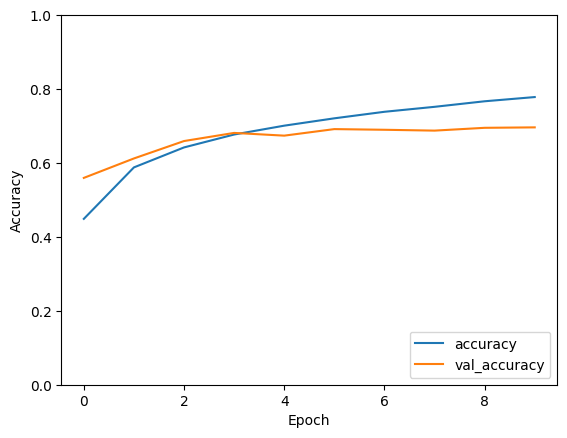

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# CIFAR-10 데이터셋 불러오기
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# 데이터 전처리: 픽셀 값을 0~1 사이로 정규화
train_images, test_images = train_images / 255.0, test_images / 255.0

# Convolutional Neural Network (CNN) 모델 정의
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),  # 추가된 층
    layers.Flatten(),
    layers.Dense(128, activation='relu'),  # 변경된 뉴런 수
    layers.Dense(10)
])

# 모델 컴파일
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)  # 학습률 조정
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# 모델 훈련
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# 모델 평가
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# 정확도 및 손실 그래프 그리기
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()
